In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/NanumSquareB.ttf").get_name()
rc('font', family=font_name)

# Open Data

In [19]:
pb_review = pd.read_csv('data/Podbbang_review.csv',index_col = 0)
pb_book = pd.read_csv('data/Podbbang_book.csv', index_col = 0)
pb_event=pd.read_csv('data/Podbbang_audio_review_event.csv',encoding = 'cp949',index_col = 0)
nv_review = pd.read_csv('data/Naver_review.csv',index_col = 0)
wl_review = pd.read_csv('data/Welaa_review.csv',index_col = 0)

In [20]:
pb_review.sample()

,nickname,rating,title,voice,author,review,created,publish,genre
12086,어리굴젓좋아,100,초등 감정 사용법,NaN,한혜원,도움이 될것 같아요,2020.10.17,생각정원,자기계발


In [21]:
pb_review['rating'] = pb_review['rating'].apply(lambda x : x/10)
pb_review.sample()

,nickname,rating,title,voice,author,review,created,publish,genre
11508,지삼출,10.0,딜리트,NaN,김유열,좋네요....♥♥,2019.11.27,쌤앤파커스,자기계발


기계가 읽은 경우 Voice가 NaN 값으로 나옴

In [47]:
print(f"리뷰 데이터의 크기는             : {pb_review.shape}")
print(f"리뷰 데이터에 포함된 유저의 수는 : {len(pb_review['nickname'].unique())} 명")
print(f"리뷰 데이터에 포함된 책의 수는   : {len(pb_review['title'].unique())} 권")

리뷰 데이터의 크기는             : (15531, 9)
리뷰 데이터에 포함된 유저의 수는 : 4450 명
리뷰 데이터에 포함된 책의 수는   : 195 권


# Distribution of Ratings

In [23]:
pb_review.groupby('rating')['title'].count().to_frame()

,title
rating,
1.0,64
2.0,37
3.0,14
4.0,39
5.0,53
6.0,291
7.0,315
8.0,1561
9.0,1280


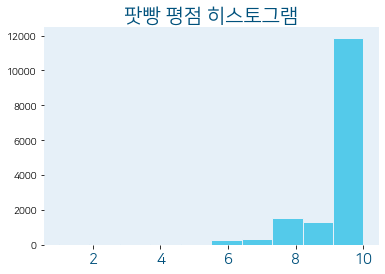

In [26]:
plt.figure(figsize=(6,4))

plt.hist(pb_review['rating']
         ,bins = 10
         ,color = '#54CAEA'
         ,ec = "#E6F0F8"
        )

plt.gca().set_facecolor('#E6F0F8')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks() #ticks= []
plt.xticks(color='#00517C', fontsize =15)

plt.title("팟빵 평점 히스토그램", size = 20, color = "#00517C", position = (0.5, 1.3))
plt.show()

# Daily Review Count

In [30]:
pb_review.sample()

,nickname,rating,title,voice,author,review,created,publish,genre
13199,변경닉네임,10.0,열하일기 첫걸음,NaN,박수밀,좋은 내용입니다,2020.09.11,(주)돌베개,인문교양


In [33]:
rating_dates = pb_review.groupby('created')[['rating', 'review']].count().reset_index()
rating_dates.columns = ['date','rating_count', 'review_count']
rating_dates['date'] = rating_dates['date'].apply(str)
rating_dates['month'] = rating_dates['date'].apply(lambda x : x[:-3])
rating_dates.tail(3)

,date,rating_count,review_count,month
421,2020.11.12,5,5,2020.11
422,2020.11.13,1,1,2020.11
423,2020.11.21,1,0,2020.11


In [37]:
rating_months = rating_dates.groupby('month')[['rating_count', 'review_count']].sum().reset_index()
rating_months.tail(11)

,month,rating_count,review_count
14,2020.01,6,6
15,2020.02,1288,1288
16,2020.03,10,10
17,2020.04,3,3
18,2020.05,3,3
19,2020.06,3,3
20,2020.07,6,6
21,2020.08,787,787
22,2020.09,1440,1439
23,2020.10,2629,2628


Text(0.5, 1.0, '월별 댓글 수(2018년 11월 ~ 2020년 11월)')

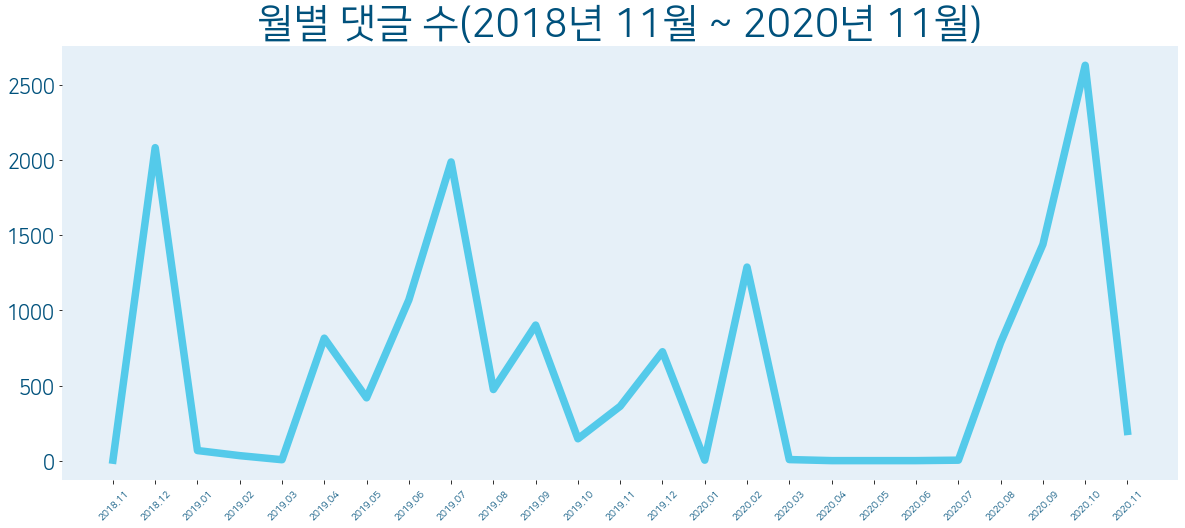

In [38]:
plt.figure(figsize=(20,8))

sns.lineplot(data = rating_months, x='month', y = 'review_count', linewidth = 7.5, color = '#54CAEA')

plt.gca().set_facecolor('#E6F0F8')

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.xticks(color='#00517C', fontsize =10, rotation = 45)
plt.yticks(color='#00517C', fontsize =20)
plt.xlabel('')
plt.ylabel('')

plt.title('월별 댓글 수(2018년 11월 ~ 2020년 11월)', size = 40, color = '#00517C')

2-7월에 거의 0에 가까운 평점/댓글 수 <br>
오디오북 댓글 리뷰 이벤트 빈도/기간과 비교해봄

# Audio Book Review Event

In [41]:
review_event = pd.read_csv('data/podbbang_audio_review_event.csv', encoding = 'cp949', index_col = 0)
review_event.sample()

,event_name,event_period,event_book
20,「좀머 씨 이야기」오디오북 구독 이벤트 !,2020.08.07~2020.08.13,좀머 씨 이야기


In [42]:
review_event['event_start'] =review_event['event_period'].apply(lambda x : x.split("~")[0])
review_event['event_end'] =review_event['event_period'].apply(lambda x : x.split("~")[1])
review_event.sample()

,event_name,event_period,event_book,event_start,event_end
16,[미스터리 오디오북 퀴즈 이벤트],2020.09.04~2020.09.10,슬리피 할로우의 전설,2020.09.04,2020.09.10


<종료된 이벤트> 사이트에 기재된 이벤트 중 오디오북 리뷰 이벤트는 아래와 같음

In [106]:
print(f"earliest event start : {min(review_event['event_start'])}")
      
print(f"last event end : {max(review_event['event_end'])}")

earliest event start : 2019.12.05
last event end : 2020.11.05


In [107]:
print(f"2019.12 - 2020.11의 기간 동안 이벤트 대상 도서는 :{len(review_event['event_book'].unique())} 권")

2019.12 - 2020.11의 기간 동안 이벤트 대상 도서는 :26 권


이벤트 대상도서 리뷰에 이벤트 기간 정보 merge 후 아래와 같이 분리<br>
+ 대상 도서에 대해) 이벤트 기간에 남겨진 리뷰
+ 대상 도서에 대해) 이벤트 기간 외에 남겨진 리뷰

In [51]:
event_only = pb_review.merge(review_event, left_on = 'title', right_on = 'event_book', how = 'inner')
review_during_event = event_only[(event_only['created'] >= event_only['event_start']) & (event_only['created'] <= event_only['event_end'])]
review_bef_aft_event = event_only[~(event_only['created'] >= event_only['event_start']) & (event_only['created'] <= event_only['event_end'])]

In [56]:
review_during_event.sample()

,nickname,rating,title,voice,author,review,created,publish,genre,event_name,event_period,event_book,event_start,event_end
798,가을아침더뉴스룸,10.0,좀머 씨 이야기,유석,파트리크 쥐스킨트,좋아요,2020.08.08,(주)열린책들,소설문학,「좀머 씨 이야기」오디오북 구독 이벤트 !,2020.08.07~2020.08.13,좀머 씨 이야기,2020.08.07,2020.08.13


In [57]:
review_bef_aft_event.sample()

,nickname,rating,title,voice,author,review,created,publish,genre,event_name,event_period,event_book,event_start,event_end
5852,우짜야,10.0,[EBS 세계문학전집] 15소년 표류기,"정형석,박지윤",쥘 베른,"참여완료,너무 기대되네요",2019.12.09,한국교육방송공사,어린이동화,EBS 세계문학전집을 오디오북으로 만나보세요.,2020.02.19~2020.02.26,[EBS 세계문학전집] 15소년 표류기,2020.02.19,2020.02.26


In [61]:
print(f"이벤트 기간에 이벤트 대상 도서에 남겨진 댓글 :{review_during_event['review'].count()}")
      
print(f"이벤트 기간 외에 이벤트 대상 도서에 남겨진 댓글 :{review_bef_aft_event['review'].count()}")

이벤트 기간에 이벤트 대상 도서에 남겨진 댓글 :5794
이벤트 기간 외에 이벤트 대상 도서에 남겨진 댓글 :59


Text(0.5, 1.0, '이벤트 대상 도서에 남겨진 댓글')

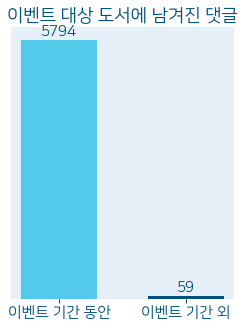

In [67]:
plt.figure(figsize=(4, 5))
x = plt.bar(['이벤트 기간 동안', '이벤트 기간 외']
        , [review_during_event['review'].count(),review_bef_aft_event['review'].count() ]
        , color = ['#54CAEA', '#00517C']
        , width = 0.6)

# Plot Formatting
plt.gca().set_facecolor('#E6F0F8')

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)


for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+100), ha = 'center', size =15, color = '#00517C')
    
    
plt.yticks(ticks= [])
plt.xticks(color='#00517C', fontsize =15)


plt.title("이벤트 대상 도서에 남겨진 댓글", fontsize = 18, color='#00517C')


In [83]:
print(f"earliest event start : {min(review_event['event_start'])}")
      
print(f"last event end : {max(review_event['event_end'])}")

earliest event start : 2019.12.05
last event end : 2020.11.05


In [116]:
len(review_during_event)

5796

In [117]:
all_review_during_event = len(pb_review[(pb_review['created'] >= '2019.12.05') & (pb_review['created'] <= '2020.11.05')])
review_event_review = len(review_during_event)

Text(0.5, 1.0, '이벤트 기간 동안 댓글')

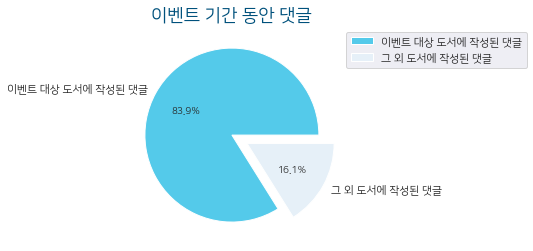

In [137]:
plt.pie([review_event_review, (all_review_during_event - review_event_review)]
        , colors = ['#54CAEA', '#E6F0F8']
        , explode = [0, 0.2]
        ,labels = ['이벤트 대상 도서에 작성된 댓글', '그 외 도서에 작성된 댓글']
        , autopct='%.1f%%' 
       )

plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("이벤트 기간 동안 댓글", fontsize = 18, color='#00517C')


Text(0.5, 1.0, '<살고 싶다는 농담> 댓글 수')

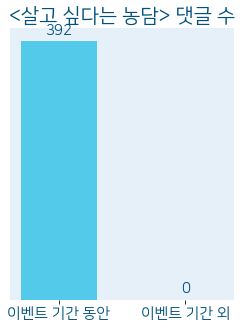

In [74]:
plt.figure(figsize=(4, 5))
x = plt.bar(['이벤트 기간 동안', '이벤트 기간 외']
        , [len(review_during_event.query('title == "살고 싶다는 농담"')), len(review_bef_aft_event.query('title == "살고 싶다는 농담"'))]
        , color = ['#54CAEA', '#00517C']
        , width = 0.6)

# Plot Formatting
plt.gca().set_facecolor('#E6F0F8')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)


for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+10), ha = 'center', size =15, color = '#00517C')
    
    
plt.yticks(ticks= [])
plt.xticks(color='#00517C', fontsize =15)

plt.title('<살고 싶다는 농담> 댓글 수', color = "#00517C", size = 20)

In [143]:
review_event.query('event_book == "살고 싶다는 농담"')['event_period']

0    2020.10.30~2020.11.05
Name: event_period, dtype: object

2020.10.30 ~ 2020.11.05 동안 댓글 이벤트가 진행된 "살고 싶다는 농담"에 해당 기간 외에 달린 댓글은 0개

# 서비스간 비교

**팟빵, 네이버, 윌라** <br>
서비스별로 600개의 댓글 랜덤 추출하여 비교

평점만 있고 댓글은 없는 경우가 있어서 제외하고 진행

In [147]:
pb_with_review = pb_review.dropna(how = 'any',subset=["review"], axis = 0)
pb_with_review["length"] = pb_with_review['review'].apply(len)
pb_with_review = pb_with_review.sample(600)
pb_with_review.sample()

C:\Users\Hanna Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nickname,rating,title,voice,author,review,created,publish,genre,length
524,호드도어,10.0,들어본 이야기,"구병모,권여선,김보나,박솔뫼,최인영","구병모,권여선,듀나,박솔뫼,한유주",잘들어보겟습니다,2020.10.23,미디어창비,소설문학,8


In [145]:
wl_with_review = wl_review.dropna(how = 'any',subset=["review"], axis = 0)
wl_with_review["length"] = wl_with_review['review'].apply(len)
wl_with_review = wl_with_review.sample(600)
wl_with_review.sample()

C:\Users\Hanna Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nickname,created,review,length
304,Jiwoo's mom,2020.10.31 11:52,사람은 말이야...그 아이를 세상에 남겨놓은 이상은 죽어도 아주 죽는게 아니래......,93


In [148]:
nv_with_review = nv_review.dropna(how = 'any',subset=["review"], axis = 0) #rating만 있는 경우 drop
nv_with_review["length"] = nv_with_review['review'].apply(len)
nv_with_review = nv_with_review.sample(600)
nv_with_review.sample()

C:\Users\Hanna Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nickname,created,review,title,author,voice,length
3,방구,2020-11-18 22:39,너무좋아요,꼬마 백만장자 삐삐,아스트리드 린드그렌,김영은,5


## 댓글 길이 비교

Text(0.5, 1.0, '플랫폼별 댓글 평균 길이')

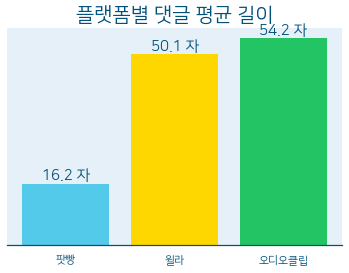

In [154]:
x = plt.bar(x=["팟빵", "윌라", "오디오클립"]
        ,height = [np.mean(pb_with_review['length']), 
                   np.mean(wl_with_review['length']),np.mean(nv_with_review['length'])]
        ,color = ["#54CAEA",  "gold", "#22C463"]
        , linewidth = 0
       )

# Plot Formatting
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_facecolor('#E6F0F8')
plt.gca().grid(False)
plt.gca().spines['left'].set_color('#00517C')
plt.gca().spines['bottom'].set_color('#00517C')

for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{round(height,1)} 자",(left+width/2, height+1), ha = 'center', size =15, color = '#00517C')

plt.yticks(ticks= [])
plt.xticks(color= '#00517C')

plt.title("플랫폼별 댓글 평균 길이", color = '#00517C', size=20)

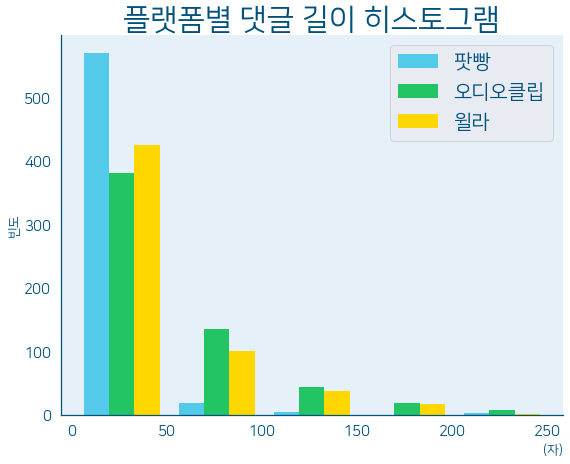

In [155]:
# 데이터
x1 = pb_with_review['length']
x2 = nv_with_review['length']
x3 = wl_with_review['length']


# 색과 라벨 붙이기
colors = ['#54CAEA', '#22C463', 'gold']
names = ['팟빵', '오디오클립', '윌라']
         
plt.figure(figsize = (9,7))
plt.hist([x1, x2, x3]
         , bins = range(1,300, 50)
         , color = colors
         , label=names
        , linewidth = 0)

# Plot formatting
l = plt.legend(fontsize = 20)
for text in l.get_texts():
    text.set_color('#00517C')

plt.gca().set_facecolor('#E6F0F8')
plt.gca().grid(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#plt.yticks(ticks= [])
plt.gca().spines['bottom'].set_color('#00517C')
plt.gca().spines['left'].set_color('#00517C')
plt.xticks(color='#00517C', fontsize =15)
plt.yticks(color='#00517C', fontsize =15)

plt.xlabel('(자)', loc = 'right', size =13, color = '#00517C')
plt.ylabel('빈도', size =13, color = '#00517C')

plt.title('플랫폼별 댓글 길이 히스토그램', color = "#00517C", size = 30)
plt.show()


아래 조건으로 댓글 필터링:
+ 댓글 길이가 10자 미만
+ <잘|들었습니다|좋아요|좋습니다|최고|재밌|감사|굿|고마|고맙> 포함


## 댓글 필터링

In [167]:
pb_fit = pb_with_review[(pb_with_review['length'] < 10) & (pb_with_review['review'].str.contains('잘|들었습니다|좋아요|좋습니다|최고|재밌|감사|굿|고마|고맙'))]

nv_fit = nv_with_review[(nv_with_review['length'] < 10) & (nv_with_review['review'].str.contains('잘|들었습니다|좋아요|좋습니다|최고|재밌|감사|굿|고마|고맙'))]

wl_fit = wl_with_review[(wl_with_review['length'] < 10) & (wl_with_review['review'].str.contains('잘|들었습니다|좋아요|좋습니다|최고|재밌|감사|굿|고마|고맙'))]

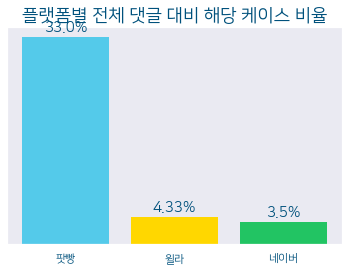

In [185]:
x = plt.bar(x = ['팟빵', '윌라', '네이버']
            , height = [len(pb_fit)/600*100,len(wl_fit)/600*100, len(nv_fit)/600*100]
            ,color = ["#54CAEA",  "gold", "#22C463"]
            ,linewidth = 0
            
           )


for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{round(height,2)}%",(left+width/2, height+1), ha = 'center', size =15, color = '#00517C')

plt.gca().grid(False)
plt.yticks(ticks= [])
plt.xticks(color='#00517C')
plt.ylabel('')

    
plt.title("플랫폼별 전체 댓글 대비 해당 케이스 비율", color = "#00517C", size = 18)
plt.show()

frequency analysis를 통해 플랫폼별 댓글의 명사, 형태소 분석 진행함 <br>
이를 토대로 명사, 형태소 가짓수를 구함

Text(0.5, 1.0, '플랫폼별 댓글 명사 개수')

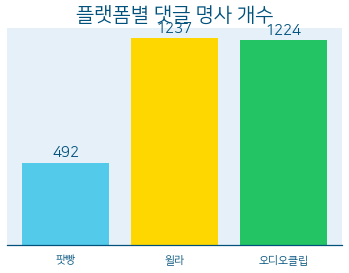

In [187]:
x = plt.bar(x=["팟빵", "윌라", "오디오클립"]
        ,height = [492, 1237, 1224]
        ,color = ["#54CAEA",  "gold", "#22C463"]
        ,linewidth = 0
       )


plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.gca().set_facecolor('#E6F0F8')
plt.gca().spines['left'].set_color('#00517C')
plt.gca().spines['bottom'].set_color('#00517C')
plt.gca().grid(False)

for p in x.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{int(height)}",(left+width/2, height+35), ha = 'center', size =15, color = '#00517C')
    
    
plt.yticks(ticks= [])
plt.xticks(color= '#00517C')

plt.title("플랫폼별 댓글 명사 개수", color = '#00517C', size=20)

## 좋아요, 잘들었어요, 감사합니다

In [189]:
good = ["좋아요", "좋네요", "좋습니다"]
good_len  = len(pb_review[pb_review['review'].isin(good)])

listen = ["잘들었습니다", "잘 들었습니다", "잘들었어요", "잘 들었어요"]
listen_len = len(pb_review[pb_review['review'].isin(listen)])

thanks = ["감사합니다", "감사해요", "고맙습니다", "고마워요"]
thanks_len = len(pb_review[pb_review['review'].isin(thanks)])

print(f"'좋아요' : {good_len}      |  전체 댓글 대비 '좋아요' 비율 : {round(good_len/len(pb_review)*100,2)}%")
print(f"'잘들었습니다' : {listen_len} |  전체 댓글 대비 '잘들었습니다' 비율 : {round(listen_len/len(pb_review)*100,2)}%")
print(f"'감사합니다' : {thanks_len}   |  전체 댓글 대비 '감사합니다' 비율 : {round(thanks_len/len(pb_review)*100,2)}%")

'좋아요' : 1361      |  전체 댓글 대비 '좋아요' 비율 : 8.76%
'잘들었습니다' : 982 |  전체 댓글 대비 '잘들었습니다' 비율 : 6.32%
'감사합니다' : 257   |  전체 댓글 대비 '감사합니다' 비율 : 1.65%


In [191]:
rest_len = len(pb_review) - (listen_len + thanks_len + good_len)

Text(0.5, 1.0, '좋아요잘들었어요감사합니다')

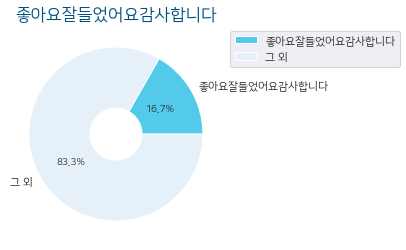

In [200]:
plt.pie([listen_len+thanks_len+good_len, rest_len], 
        labels = ["좋아요잘들었어요감사합니다","그 외"], 
        autopct='%.1f%%',
        colors = ["#54CAEA", "#E6F0F8"],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
       )


plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("좋아요잘들었어요감사합니다", fontdict = {'color': '#00517C', 'size': 17})

타사와 비교

In [203]:
good = ["좋아요", "좋네요", "좋습니다"]
good_len  = len(wl_review[wl_review['review'].isin(good)])

listen = ["잘들었습니다", "잘 들었습니다", "잘들었어요", "잘 들었어요"]
listen_len = len(wl_review[wl_review['review'].isin(listen)])

thanks = ["감사합니다", "감사해요", "고맙습니다", "고마워요"]
thanks_len = len(wl_review[wl_review['review'].isin(thanks)])

print(f"'좋아요' : {good_len}      |  전체 댓글 대비 '좋아요' 비율 : {round(good_len/len(wl_review)*100,2)}%")
print(f"'잘들었습니다' : {listen_len} |  전체 댓글 대비 '잘들었습니다' 비율 : {round(listen_len/len(wl_review)*100,2)}%")
print(f"'감사합니다' : {thanks_len}   |  전체 댓글 대비 '감사합니다' 비율 : {round(thanks_len/len(wl_review)*100,2)}%")

'좋아요' : 34      |  전체 댓글 대비 '좋아요' 비율 : 0.84%
'잘들었습니다' : 10 |  전체 댓글 대비 '잘들었습니다' 비율 : 0.25%
'감사합니다' : 2   |  전체 댓글 대비 '감사합니다' 비율 : 0.05%


In [204]:
good = ["좋아요", "좋네요", "좋습니다"]
good_len  = len(nv_review[nv_review['review'].isin(good)])

listen = ["잘들었습니다", "잘 들었습니다", "잘들었어요", "잘 들었어요"]
listen_len = len(nv_review[nv_review['review'].isin(listen)])

thanks = ["감사합니다", "감사해요", "고맙습니다", "고마워요"]
thanks_len = len(nv_review[nv_review['review'].isin(thanks)])

print(f"'좋아요' : {good_len}      |  전체 댓글 대비 '좋아요' 비율 : {round(good_len/len(nv_review)*100,2)}%")
print(f"'잘들었습니다' : {listen_len} |  전체 댓글 대비 '잘들었습니다' 비율 : {round(listen_len/len(nv_review)*100,2)}%")
print(f"'감사합니다' : {thanks_len}   |  전체 댓글 대비 '감사합니다' 비율 : {round(thanks_len/len(nv_review)*100,2)}%")

'좋아요' : 5      |  전체 댓글 대비 '좋아요' 비율 : 0.37%
'잘들었습니다' : 6 |  전체 댓글 대비 '잘들었습니다' 비율 : 0.44%
'감사합니다' : 5   |  전체 댓글 대비 '감사합니다' 비율 : 0.37%
